# Rossmann operates over 3,000 drug stores in 7 European countries. The primary challenge at hand is to accurately forecast the daily sales of these stores for the upcoming six weeks. To address this challenge, the project leverages historical sales data, comprising 1,017,209 rows and 18 columns, to develop predictive models that can provide valuable insights into future sales trends and patterns.¶

# Field Descriptions

- **Id**: Unique identifier for each (Store, Date) pair in the test set.
- **Store**: Unique store identifier.
- **Sales**: Daily turnover (the prediction target).
- **Customers**: Number of customers on a given day.
- **Open**: Store open status (0 = closed, 1 = open).
- **StateHoliday**: Type of state holiday (a = public holiday, b = Easter, c = Christmas, 0 = None).
- **SchoolHoliday**: Indicates if the store was affected by the closure of public schools.
- **StoreType**: Store model categorization (a, b, c, d).
- **Assortment**: Assortment level (a = basic, b = extra, c = extended).
- **CompetitionDistance**: Distance to the nearest competitor store (in meters).
- **CompetitionOpenSince[Month/Year]**: Approximate opening month and year of the nearest competitor.
- **Promo**: Store running a promo on that day (0 = no, 1 = yes).
- **Promo2**: Store participating in consecutive promotions (0 = no, 1 = yes).
- **Promo2Since[Year/Week]**: Year and calendar week when Promo2 started.
- **PromoInterval**: Months when Promo2 is active (e.g., "Feb,May,Aug,Nov").

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import(
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor
)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from math import sqrt


In [2]:
#pip install xgboost

In [3]:
df1=pd.read_csv(r"C:\Users\riyaz\Downloads\Rossmann Stores Data.csv")

C:\Users\riyaz\AppData\Local\Temp\ipykernel_11864\1340809325.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv(r"C:\Users\riyaz\Downloads\Rossmann Stores Data.csv")


In [4]:
df2=pd.read_csv(r"C:\Users\riyaz\Downloads\store.csv")

In [5]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
df3=pd.concat([df1,df2],axis=1)

In [8]:
df3.head().to_csv('ros.csv')

In [9]:
df3.to_csv('file10.csv')

In [10]:
df3.shape

(1017209, 19)

In [11]:
df3 = df3.loc[:, ~df3.columns.duplicated()]

In [12]:
df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0.0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1.0,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1.0,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0.0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0.0,NaN,NaN,NaN


In [13]:
df3['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [14]:
#Total avg. sales


# Top 5 of (Avg. sales per day per store)


# Avg. sales per day per store type
#Avg. sales on SchoolHoliday


#Avg. sales on StateHoliday
#  For the top 5 stores - comparison between avg. sales vs. avg. sales on StateHoliday vs avg. sales on SchoolHolidays(stacked bar chart)

In [15]:
df2.Assortment.value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

In [16]:
# Check assortment sales for a and b
#More the no of customer footfall higher the sales...verify ...line graph ...footfall and sales

In [17]:
df3['CompetitionOpenSinceYear'].dtype

dtype('float64')

# Know your data

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1115 non-null     object 
 10  Assortment                 1115 non-null     object 
 11  CompetitionDistance        1112 non-null     float64
 12  CompetitionOpenSinceMonth  761 non-null      float64
 13  CompetitionO

In [19]:
df3.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [20]:
df3.isnull().sum()

Store                              0
DayOfWeek                          0
Date                               0
Sales                              0
Customers                          0
Open                               0
Promo                              0
StateHoliday                       0
SchoolHoliday                      0
StoreType                    1016094
Assortment                   1016094
CompetitionDistance          1016097
CompetitionOpenSinceMonth    1016448
CompetitionOpenSinceYear     1016448
Promo2                       1016094
Promo2SinceWeek              1016638
Promo2SinceYear              1016638
PromoInterval                1016638
dtype: int64

In [21]:
df3[df3.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


# Plotting value counts of columns

Text(0.5, 1.0, 'Counts of store types')

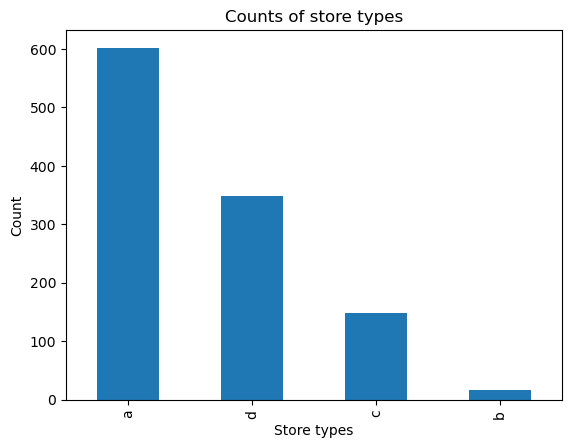

In [22]:
df3['StoreType'].value_counts().plot(kind='bar')
plt.xlabel('Store types')
plt.ylabel('Count')
plt.title('Counts of store types')

# Checking normality of missing value columns

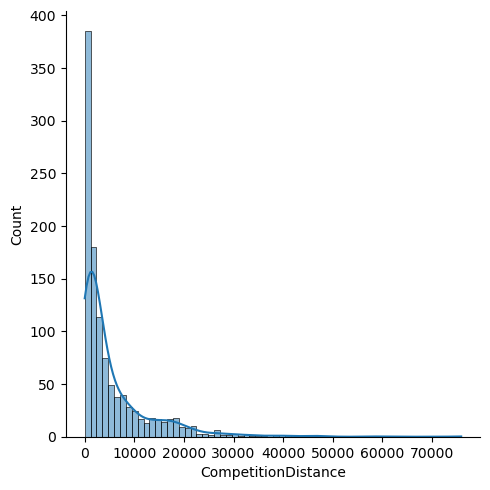

In [23]:

sns.displot(df3['CompetitionDistance'], kde=True)

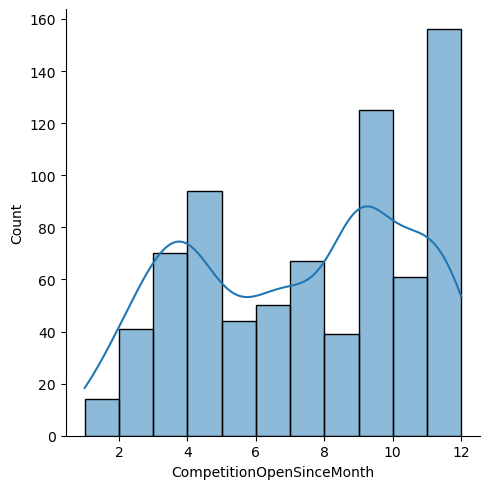

In [24]:
sns.displot(df3['CompetitionOpenSinceMonth'], kde=True)

<AxesSubplot:>

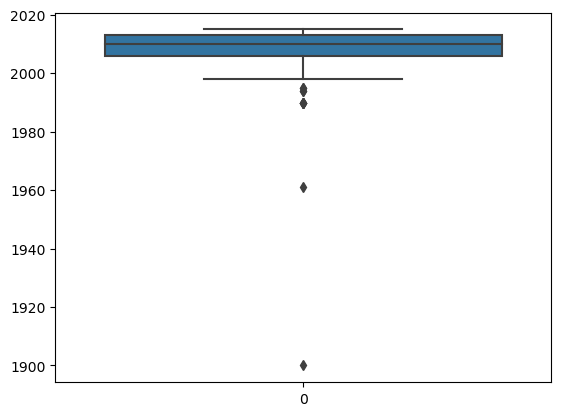

In [25]:
sns.boxplot(df3['CompetitionOpenSinceYear'])

<AxesSubplot:xlabel='Promo2SinceWeek', ylabel='Count'>

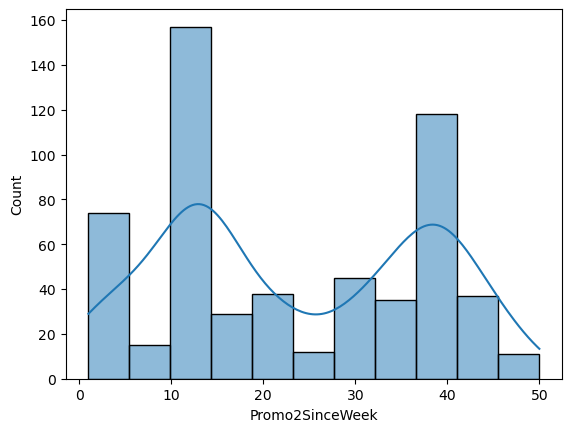

In [26]:
sns.histplot(df3['Promo2SinceWeek'],kde=True)

<AxesSubplot:>

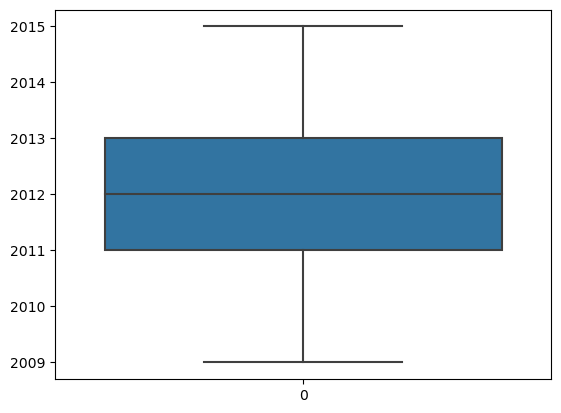

In [27]:
sns.boxplot(df3['Promo2SinceYear'])

<AxesSubplot:xlabel='PromoInterval', ylabel='Count'>

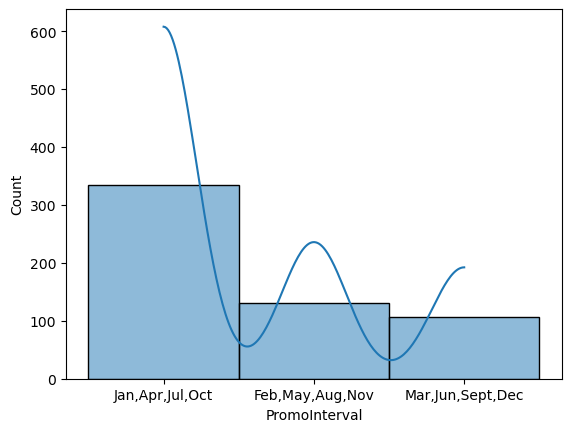

In [28]:
sns.histplot(df3['PromoInterval'],kde=True)

# Exploratory Data Analysis for time series data

EDA(exploratory data analysis)
Summary Statistics
Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.
Visualize the Time Series Data
Plot the Time Series data

Plot the rolling mean and rolling standard deviation of the Time Series data.

Decompose the Time Series Data check for any trends, seasonality, and Noise.

Plot the decomposed components to get a better understanding of the Time Series data.

Stationarity Check
Check for stationarity.
Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.
Check for Autocorrelation
Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.
Outlier Detection
Detect and handle outliers using statistical methods or machine learning techniques.
Check for Autocorrelation
Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

## Handling missing values

In [35]:
df3.fillna(df3.median(),inplace=True)

C:\Users\riyaz\AppData\Local\Temp\ipykernel_11864\882615893.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3.fillna(df3.median(),inplace=True)


In [36]:
df3.isnull().sum()

Store                              0
DayOfWeek                          0
Date                               0
Sales                              0
Customers                          0
Open                               0
Promo                              0
StateHoliday                       0
SchoolHoliday                      0
StoreType                    1016094
Assortment                   1016094
CompetitionDistance                0
CompetitionOpenSinceMonth          0
CompetitionOpenSinceYear           0
Promo2                             0
Promo2SinceWeek                    0
Promo2SinceYear                    0
PromoInterval                1016638
dtype: int64

### Cleaning the data

In [37]:
df3['Assortment'].mode()

0    a
Name: Assortment, dtype: object

In [38]:
df3['StateHoliday'].loc[df3['StateHoliday']==0]='0'

C:\Users\riyaz\AppData\Local\Temp\ipykernel_11864\863592744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['StateHoliday'].loc[df3['StateHoliday']==0]='0'


In [39]:
df3['Assortment'] = df3['Assortment'].fillna(df3['Assortment'].mode().iloc[0])


In [40]:
df3['StoreType'].mode()

0    a
Name: StoreType, dtype: object

In [41]:
df3['StoreType']=df3['StoreType'].fillna(df3['StoreType'].mode().iloc[0])

In [42]:
df3['PromoInterval']=df3['PromoInterval'].fillna(df3['PromoInterval'].mode().iloc[0])

In [43]:
df3['PromoInterval'].isnull().sum()

0

In [44]:
df3['Promo2SinceYear'].unique()

array([2012., 2010., 2011., 2009., 2014., 2015., 2013.])

In [45]:
#df3['Promo2SinceYear']= pd.to_datetime(df3['Promo2SinceYear'], format='%Y')

In [46]:
df3['Promo2SinceYear']=df3['Promo2SinceYear'].astype(int)

In [47]:
df3['CompetitionOpenSinceMonth']=df3['CompetitionOpenSinceMonth'].astype(int)

In [48]:
df3['Promo2']=df3['Promo2'].astype(int)

In [49]:
df3['Promo2SinceWeek']=df3['Promo2SinceWeek'].astype(int)

In [50]:
df3['Promo2SinceWeek']=df3['Promo2SinceWeek'].astype(int)

In [51]:
df3['PromoInterval']

0          Jan,Apr,Jul,Oct
1          Jan,Apr,Jul,Oct
2          Jan,Apr,Jul,Oct
3          Jan,Apr,Jul,Oct
4          Jan,Apr,Jul,Oct
                ...       
1017204    Jan,Apr,Jul,Oct
1017205    Jan,Apr,Jul,Oct
1017206    Jan,Apr,Jul,Oct
1017207    Jan,Apr,Jul,Oct
1017208    Jan,Apr,Jul,Oct
Name: PromoInterval, Length: 1017209, dtype: object

In [52]:
#df3['PromoInterval'].replace({'Jan,Apr,Jul,Oct':0,'Feb,May,Aug,Nov':1,'Mar,Jun,Sept,Dec':2},inplace=True)

In [53]:
df3['PromoInterval'].unique()

array(['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [54]:
#df3['PromoInterval']= df3['PromoInterval'].str.split(',').str[0]

In [55]:
df3['PromoInterval'].unique()

array(['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [56]:
print(df3['PromoInterval'])

0          Jan,Apr,Jul,Oct
1          Jan,Apr,Jul,Oct
2          Jan,Apr,Jul,Oct
3          Jan,Apr,Jul,Oct
4          Jan,Apr,Jul,Oct
                ...       
1017204    Jan,Apr,Jul,Oct
1017205    Jan,Apr,Jul,Oct
1017206    Jan,Apr,Jul,Oct
1017207    Jan,Apr,Jul,Oct
1017208    Jan,Apr,Jul,Oct
Name: PromoInterval, Length: 1017209, dtype: object


In [57]:
#df3['PromoInterval']= df3['PromoInterval'].str.split(',').str[1]

In [58]:
df3['PromoInterval'].unique()

array(['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [59]:
replace_dict ={'Jan,Apr,Jul,Oct': 0, 'Feb,May,Aug,Nov': 1, 'Mar,Jun,Sept,Dec': 2}

In [60]:
df3['PromoInterval']=df3['PromoInterval'].map(replace_dict)

In [61]:
df3['PromoInterval'].isnull().sum()

0

In [62]:
df3['PromoInterval']

0          0
1          0
2          0
3          0
4          0
          ..
1017204    0
1017205    0
1017206    0
1017207    0
1017208    0
Name: PromoInterval, Length: 1017209, dtype: int64

In [63]:
from datetime import datetime

In [64]:
df3['DayOfWeek']

0          5
1          5
2          5
3          5
4          5
          ..
1017204    2
1017205    2
1017206    2
1017207    2
1017208    2
Name: DayOfWeek, Length: 1017209, dtype: int64

In [65]:
day_of_week_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

In [66]:
df3['weekday'] = df3['DayOfWeek'].map(day_of_week_mapping)

In [67]:
df3['weekday']

0           Saturday
1           Saturday
2           Saturday
3           Saturday
4           Saturday
             ...    
1017204    Wednesday
1017205    Wednesday
1017206    Wednesday
1017207    Wednesday
1017208    Wednesday
Name: weekday, Length: 1017209, dtype: object

In [68]:
Avg_sales_store=df3.groupby('Store')['Sales'].mean()

In [69]:
avg_sales_store_day=df3.groupby(['Store', 'weekday'])['Sales'].mean()

In [70]:

avg_sales_store_day



Store  weekday  
1      Friday       4094.607407
       Saturday     4516.414815
       Sunday       4942.970149
       Thursday     4454.474074
       Tuesday      4946.119403
                       ...     
1115   Saturday     6208.881481
       Sunday       6773.388060
       Thursday     5666.155556
       Tuesday      6704.223881
       Wednesday    5811.533333
Name: Sales, Length: 6690, dtype: float64

In [71]:
top5_str_sls_day=df3.groupby(['Store', 'weekday'])['Sales'].mean().nlargest(n=5)
top5_str_sls_day
# Top 5 of (Avg. sales per day per store)

Store  weekday  
817    Tuesday      24186.365672
       Wednesday    23469.207407
       Thursday     22187.000000
1114   Sunday       21935.500000
817    Friday       21302.755556
Name: Sales, dtype: float64

In [72]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  int32  
 13  CompetitionO

In [73]:
# Avg. sales per day per store type
top5_Avg_sal_day_str_type=df3.groupby(['StoreType', 'weekday'])['Sales'].mean().nlargest(n=5)
top5_Avg_sal_day_str_type

StoreType  weekday  
b          Saturday     12677.764706
c          Saturday      9109.317568
d          Saturday      9096.795977
a          Tuesday       7809.044510
           Wednesday     7005.244467
Name: Sales, dtype: float64

In [74]:
#Avg. sales on SchoolHoliday


In [75]:
Avg_sal_stateHoliday=df3.groupby('StateHoliday')['Sales'].mean()
Avg_sal_stateHoliday

StateHoliday
0    5947.483893
a     290.735686
b     214.311510
c     168.733171
Name: Sales, dtype: float64

In [76]:
df3['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [77]:
school_holidays=df3[df3['SchoolHoliday']==1]

In [78]:
Avg_sal_schoolHolidays=school_holidays['Sales'].mean()

In [79]:
Avg_sal_schoolHolidays

6476.522207119706

In [80]:
state_holidays=df3[df3['StateHoliday']==1]

In [81]:
Avg_sal_stateHolidays=state_holidays['Sales'].mean()
Avg_sal_stateHolidays

nan

In [82]:
#plot Avg_sal_schoolHolidays,Avg_sal_stateHolidays,top5_str_sls_day

In [83]:
df3['Promo2SinceYear'].unique()

array([2012, 2010, 2011, 2009, 2014, 2015, 2013])

In [84]:
df3['StateHoliday'].mode()

0    0
Name: StateHoliday, dtype: object

# Feature Engineering

In [86]:
df3['StoreType']=pd.get_dummies('StoreType')

In [87]:
df3['StateHoliday']=pd.get_dummies('StateHoliday')

In [88]:
df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekday
0,1,5,2015-07-31,5263,555,1,1,1.0,1,1.0,a,1270.0,9,2008.0,0,22,2012,0,Saturday
1,2,5,2015-07-31,6064,625,1,1,NaN,1,NaN,a,570.0,11,2007.0,1,13,2010,0,Saturday
2,3,5,2015-07-31,8314,821,1,1,NaN,1,NaN,a,14130.0,12,2006.0,1,14,2011,0,Saturday
3,4,5,2015-07-31,13995,1498,1,1,NaN,1,NaN,c,620.0,9,2009.0,0,22,2012,0,Saturday
4,5,5,2015-07-31,4822,559,1,1,NaN,1,NaN,a,29910.0,4,2015.0,0,22,2012,0,Saturday


In [89]:
df3['Assortment']=pd.get_dummies('Assortment')

In [90]:
df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekday
0,1,5,2015-07-31,5263,555,1,1,1.0,1,1.0,1.0,1270.0,9,2008.0,0,22,2012,0,Saturday
1,2,5,2015-07-31,6064,625,1,1,NaN,1,NaN,NaN,570.0,11,2007.0,1,13,2010,0,Saturday
2,3,5,2015-07-31,8314,821,1,1,NaN,1,NaN,NaN,14130.0,12,2006.0,1,14,2011,0,Saturday
3,4,5,2015-07-31,13995,1498,1,1,NaN,1,NaN,NaN,620.0,9,2009.0,0,22,2012,0,Saturday
4,5,5,2015-07-31,4822,559,1,1,NaN,1,NaN,NaN,29910.0,4,2015.0,0,22,2012,0,Saturday


In [91]:
from datetime import datetime

In [92]:
df3['Date'] = pd.to_datetime(df3['Date'])

In [93]:
#df3['year'] = df3['Date'].dt.year
#df3['month'] = df3['Date'].dt.month
#df3['day'] = df3['Date'].dt.day



In [94]:
df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekday
0,1,5,2015-07-31,5263,555,1,1,1.0,1,1.0,1.0,1270.0,9,2008.0,0,22,2012,0,Saturday
1,2,5,2015-07-31,6064,625,1,1,NaN,1,NaN,NaN,570.0,11,2007.0,1,13,2010,0,Saturday
2,3,5,2015-07-31,8314,821,1,1,NaN,1,NaN,NaN,14130.0,12,2006.0,1,14,2011,0,Saturday
3,4,5,2015-07-31,13995,1498,1,1,NaN,1,NaN,NaN,620.0,9,2009.0,0,22,2012,0,Saturday
4,5,5,2015-07-31,4822,559,1,1,NaN,1,NaN,NaN,29910.0,4,2015.0,0,22,2012,0,Saturday


In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler()

In [97]:
df3[['Scaled_Promo2SinceWeek']]=scaler.fit_transform(df3[['Promo2SinceWeek']])

In [98]:
df3[['Scaled_CompetitionDistance']]=scaler.fit_transform(df3[['CompetitionDistance']])

In [99]:
df3[['Scaled_Customers']]=scaler.fit_transform(df3[['Customers']])

In [100]:
df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekday,Scaled_Promo2SinceWeek,Scaled_CompetitionDistance,Scaled_Customers
0,1,5,2015-07-31,5263,555,1,1,1.0,1,1.0,...,9,2008.0,0,22,2012,0,Saturday,0.428571,0.016482,0.075122
1,2,5,2015-07-31,6064,625,1,1,NaN,1,NaN,...,11,2007.0,1,13,2010,0,Saturday,0.244898,0.007252,0.084597
2,3,5,2015-07-31,8314,821,1,1,NaN,1,NaN,...,12,2006.0,1,14,2011,0,Saturday,0.265306,0.186050,0.111126
3,4,5,2015-07-31,13995,1498,1,1,NaN,1,NaN,...,9,2009.0,0,22,2012,0,Saturday,0.428571,0.007911,0.202761
4,5,5,2015-07-31,4822,559,1,1,NaN,1,NaN,...,4,2015.0,0,22,2012,0,Saturday,0.428571,0.394119,0.075663


<AxesSubplot:>

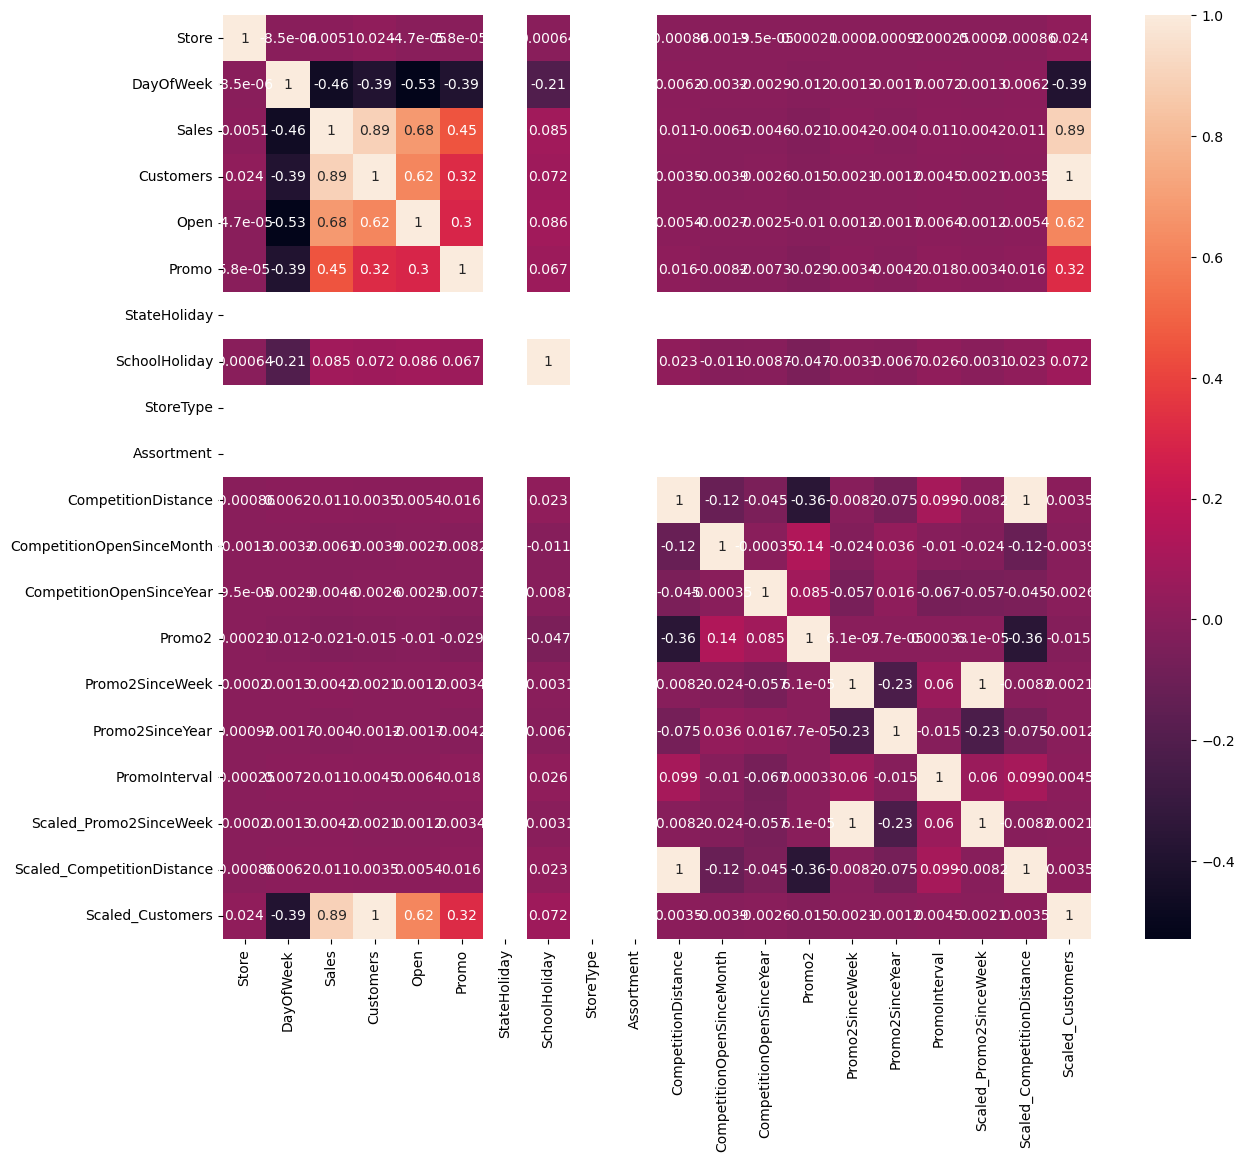

In [101]:
plt.figure(figsize=(14,12))
sns.heatmap(df3.corr(),annot=True)

In [102]:
#X=df3.drop('Sales',axis=1)


In [103]:
#y=df3['Sales']

In [104]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=1)

In [105]:
#X_train.shape

In [106]:
#y_train.shape

In [107]:
#X_test.shape

In [108]:
df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekday,Scaled_Promo2SinceWeek,Scaled_CompetitionDistance,Scaled_Customers
0,1,5,2015-07-31,5263,555,1,1,1.0,1,1.0,...,9,2008.0,0,22,2012,0,Saturday,0.428571,0.016482,0.075122
1,2,5,2015-07-31,6064,625,1,1,NaN,1,NaN,...,11,2007.0,1,13,2010,0,Saturday,0.244898,0.007252,0.084597
2,3,5,2015-07-31,8314,821,1,1,NaN,1,NaN,...,12,2006.0,1,14,2011,0,Saturday,0.265306,0.186050,0.111126
3,4,5,2015-07-31,13995,1498,1,1,NaN,1,NaN,...,9,2009.0,0,22,2012,0,Saturday,0.428571,0.007911,0.202761
4,5,5,2015-07-31,4822,559,1,1,NaN,1,NaN,...,4,2015.0,0,22,2012,0,Saturday,0.428571,0.394119,0.075663


In [109]:
Rossman_sales=df3[["Date","Sales"]]

In [110]:
Rossman_sales.head(7)

,Date,Sales
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822
5,2015-07-31,5651
6,2015-07-31,15344


In [111]:
Rossman_sales.describe()

,Sales
count,1.017209e+06
mean,5.773819e+03
std,3.849926e+03
min,0.000000e+00
25%,3.727000e+03
50%,5.744000e+03
75%,7.856000e+03
max,4.155100e+04


In [112]:
Rossman_sales.set_index('Date',inplace=True)

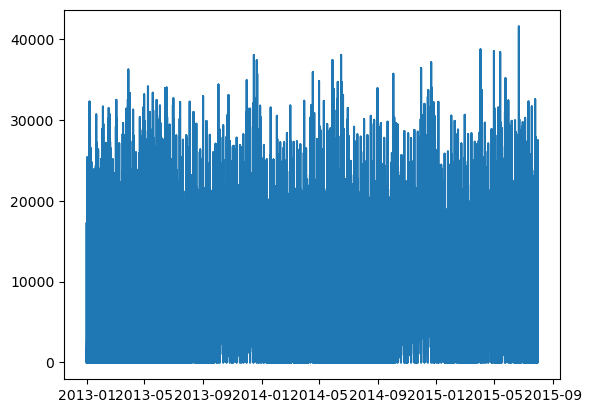

In [113]:
plt.plot(Rossman_sales.Sales)

(array([2.96673e+05, 5.05472e+05, 1.69792e+05, 3.32340e+04, 8.90100e+03,
        2.36200e+03, 5.65000e+02, 1.74000e+02, 2.80000e+01, 8.00000e+00]),
 array([    0. ,  4155.1,  8310.2, 12465.3, 16620.4, 20775.5, 24930.6,
        29085.7, 33240.8, 37395.9, 41551. ]),
 <BarContainer object of 10 artists>)

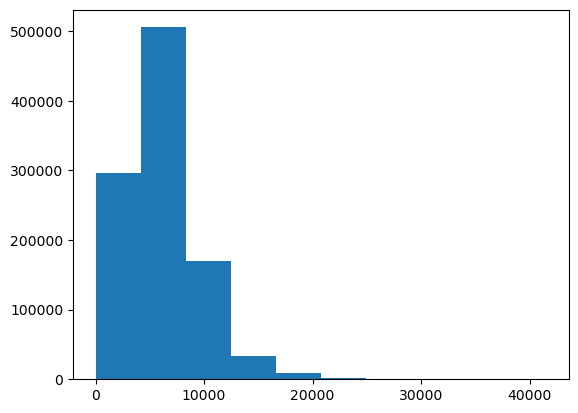

In [114]:
plt.hist(Rossman_sales.Sales)

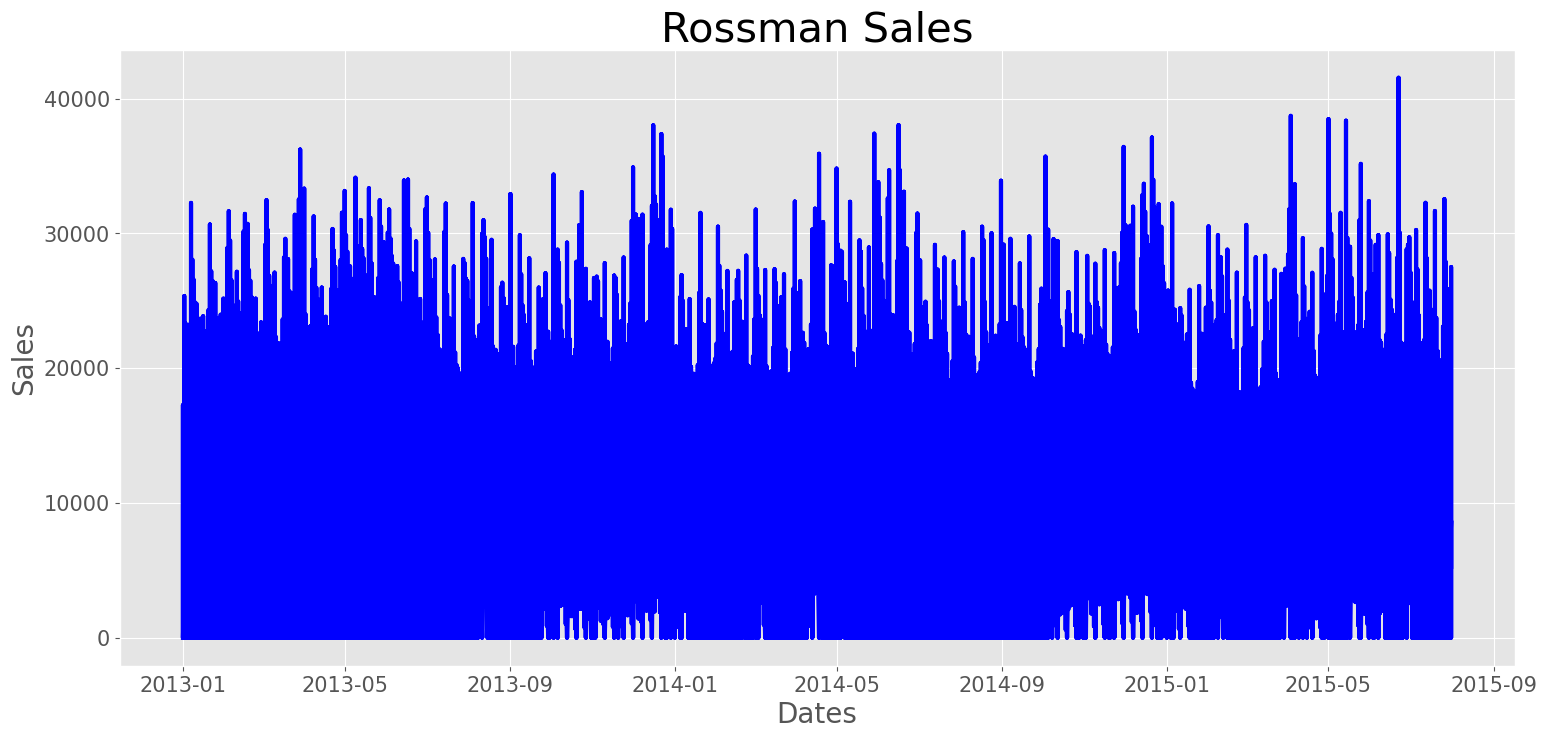

In [115]:
# plotting sales
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Sales', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(Rossman_sales['Sales'], linewidth = 3, color = 'blue')
plt.title('Rossman Sales', fontsize = 30)
plt.show()

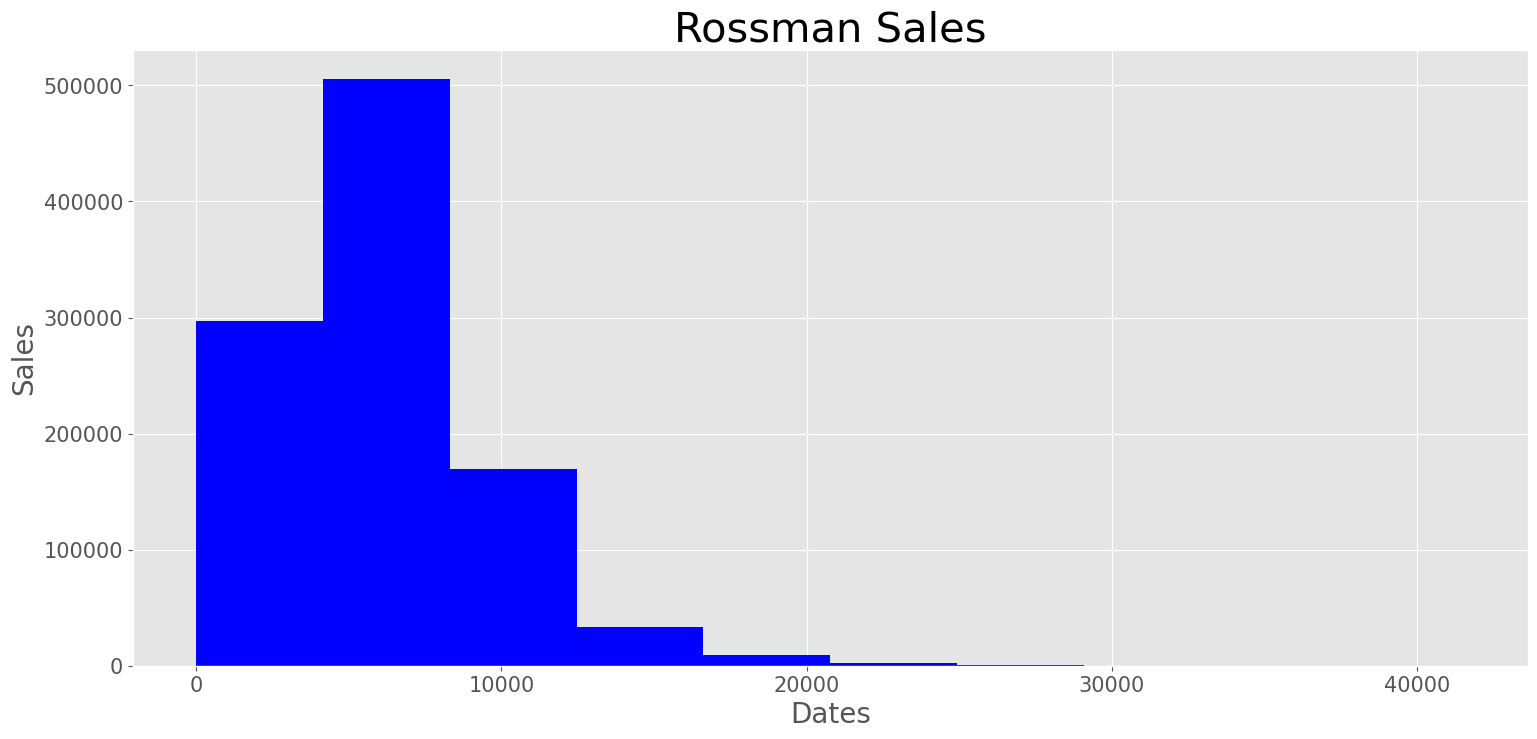

In [116]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Sales', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.hist(Rossman_sales['Sales'], linewidth = 3, color = 'blue')
plt.title('Rossman Sales', fontsize = 30)
plt.show()

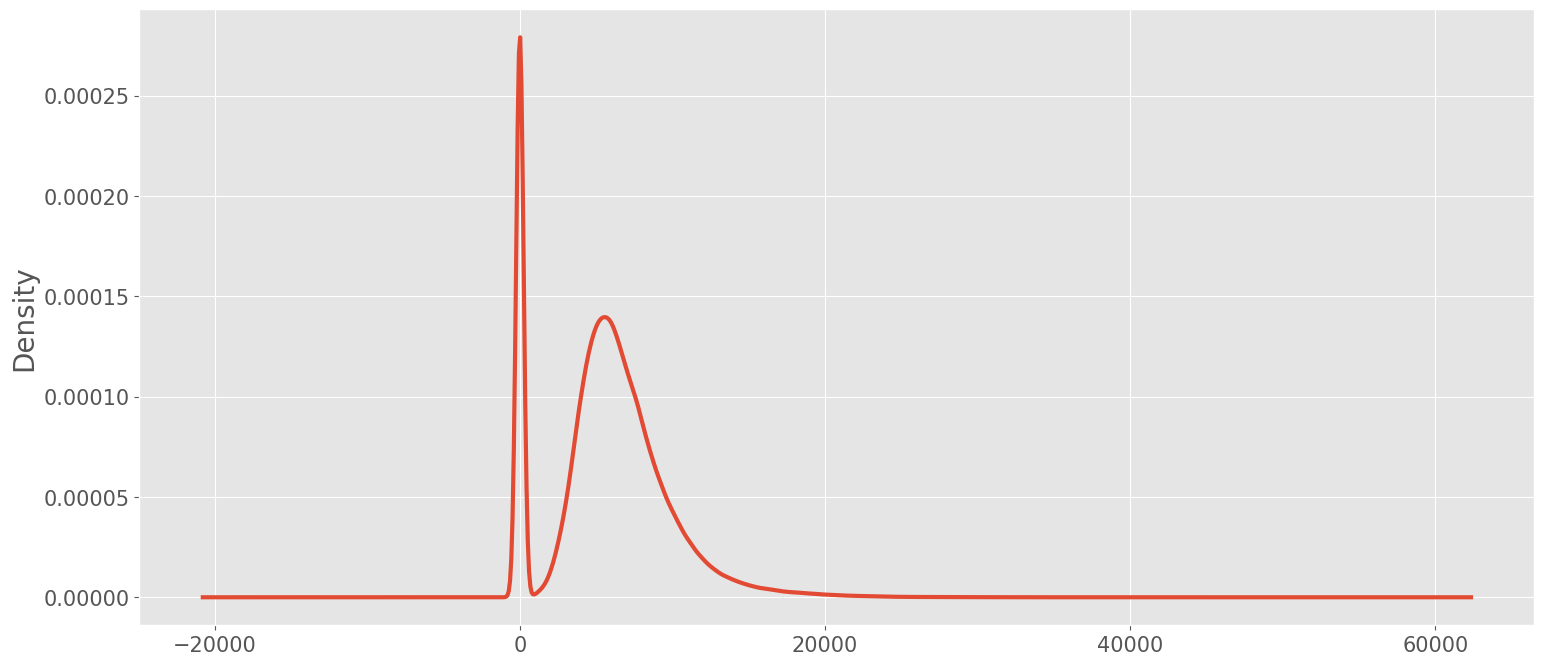

In [117]:
# Distribution of the sales
df_sales = Rossman_sales['Sales'] 
df_sales.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [118]:
rolmean=Rossman_sales['Sales'].rolling(48).mean()

In [119]:
rolstd=Rossman_sales['Sales'].rolling(48).std()

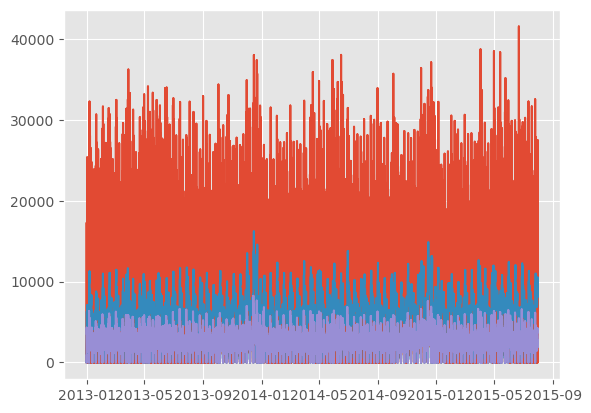

In [120]:
plt.plot(Rossman_sales.Sales)
plt.plot(rolmean)
plt.plot(rolstd)

In [121]:
!pip install statsmodels

In [122]:
#ADF(ada fullar test)
#from statsmodels.tsa.stattools import adfuller


In [123]:
#adft=adfuller(Rossman_sales['Sales'],maxlag=10)

In [124]:
#pd.Series(adft[0:4],index=["test stats","p-value","lag","data points"])

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(Rossman_sales[["Sales"]],period=12)

In [126]:
Rossman_sales['Sales'].head()

Date
2015-07-31     5263
2015-07-31     6064
2015-07-31     8314
2015-07-31    13995
2015-07-31     4822
Name: Sales, dtype: int64

# Detecting and handling outliers

In [127]:
import seaborn as sns

<AxesSubplot:>

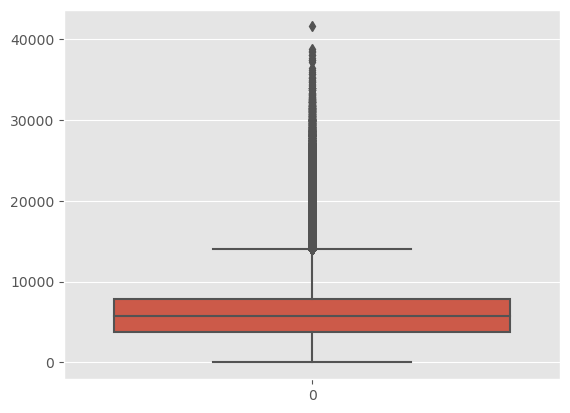

In [128]:
sns.boxplot(Rossman_sales['Sales'])

In [129]:
# Calculate the IQR
Q1 = Rossman_sales['Sales'].quantile(0.25)
Q3 = Rossman_sales['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define Winsorization limits 
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


# Winsorize the column
Rossman_sales['Sales'] = Rossman_sales['Sales'].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

C:\Users\riyaz\AppData\Local\Temp\ipykernel_11864\2892246881.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rossman_sales['Sales'] = Rossman_sales['Sales'].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))


In [130]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

In [131]:
#plot_acf(Rossman_sales['Sales'], lags=40)
#plt.title("Autocorrelation Function")
#plt.show()



In [132]:
#plot_pacf(Rossman_sales['Sales'], lags=40)
#plt.title("PartialAutocorrelation Function")



# Model Building

In [133]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [134]:
train_data=Rossman_sales['Sales'][:400]
test_data=Rossman_sales['Sales'][400:500]

In [135]:
history=[x for x in train_data]

In [136]:
model=ARIMA(history,order=(1,1,1))

In [137]:
model=model.fit()

In [138]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  400
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3704.237
Date:                Fri, 29 Sep 2023   AIC                           7414.474
Time:                        19:10:41   BIC                           7426.441
Sample:                             0   HQIC                          7419.214
                                - 400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0232      0.051     -0.458      0.647      -0.123       0.076
ma.L1         -0.9783      0.013    -75.944      0.000      -1.004      -0.953
sigma2      6.719e+06   1.33e-10   5.06e+16      0.000    6.72e+06    6.72e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.81
Prob(Q):                              0.95   Prob(JB):                         0.25
Heteroskedasticity (H):               0.98   Skew:                             0.19
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.13e+33. Standard errors may be unstable.
"""

In [142]:
model.forecast()

array([9603.82403924])

In [139]:
test_data[0]

8951.0

In [140]:
mean_squared_error([test_data[0]],model.forecast())

426179.22621175024

In [141]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

652.8240392416246

In [143]:
p_values=range(0,3)
d_values=range(0,3)
q_values=range(0,3)

In [144]:
for i in p_values:
    for j in d_values:
        for k in q_values:
            print(i,j,k)


0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [145]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [154]:
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score = float('inf')
    best_cfg = None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except Exception as e:
                    print(f"An error occurred for order {order}: {e}")
                    continue
                    print('bestArima% RMSE=%.3f' %(best_cfg,best_score))


In [ ]:
evaluate_models(train_data,test_data,p_values,d_values,q_values)

ARIMA(0, 0, 0) RMSE=2623.368
ARIMA(0, 0, 1) RMSE=2626.928
ARIMA(0, 0, 2) RMSE=2634.711
ARIMA(0, 1, 0) RMSE=3671.538
ARIMA(0, 1, 1) RMSE=2647.239
ARIMA(0, 1, 2) RMSE=2669.719
ARIMA(0, 2, 0) RMSE=6299.863


C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 1) RMSE=3675.912
ARIMA(0, 2, 2) RMSE=2658.008
ARIMA(1, 0, 0) RMSE=2627.177


C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 0, 1) RMSE=2632.579
ARIMA(1, 0, 2) RMSE=2636.767
ARIMA(1, 1, 0) RMSE=3264.812
ARIMA(1, 1, 1) RMSE=2650.562


C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\base\model

ARIMA(1, 1, 2) RMSE=2666.211
ARIMA(1, 2, 0) RMSE=4847.368
ARIMA(1, 2, 1) RMSE=3268.592


C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarnin

ARIMA(1, 2, 2) RMSE=2668.961
ARIMA(2, 0, 0) RMSE=2635.110


C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 1) RMSE=2636.295


C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(2, 0, 2) RMSE=2637.511
ARIMA(2, 1, 0) RMSE=3082.507
ARIMA(2, 1, 1) RMSE=2660.463


C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\riyaz\anaconda3\lib\site-packages\statsmodels\base\model